# 1. Import packages

In [1]:
# basic package
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
import seaborn as sns
sns.set(style='whitegrid', color_codes=True)
import scipy.stats as stats
# models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet 
from mlxtend.regressor import StackingCVRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import sklearn.linear_model as linear_model
from sklearn.cluster import KMeans

# 2. Loading dataset

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 3. Exploratory Data Analysis

In [3]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
## two types of features
categorical_features = [f for f in train_data.columns if train_data.dtypes[f] == 'object']
numerical_features = [f for f in train_data.columns if train_data.dtypes[f] != 'object']
numerical_features.remove('SalePrice')
numerical_features.remove('Id')
print("categorical_features:",categorical_features)
print("\n")
print("numerical_features:",numerical_features)

categorical_features: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


numerical_features: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'Garag

<Axes: title={'center': 'Target Value Distribution'}, xlabel='SalePrice', ylabel='Count'>

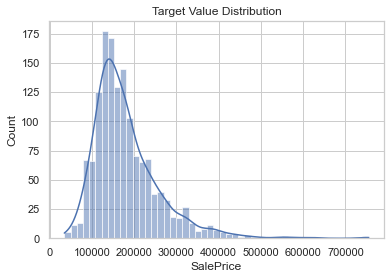

In [5]:
## distribution of target value
y = train_data['SalePrice']
plt.figure()
plt.title('Target Value Distribution')
sns.histplot(y, kde=True)

<Axes: >

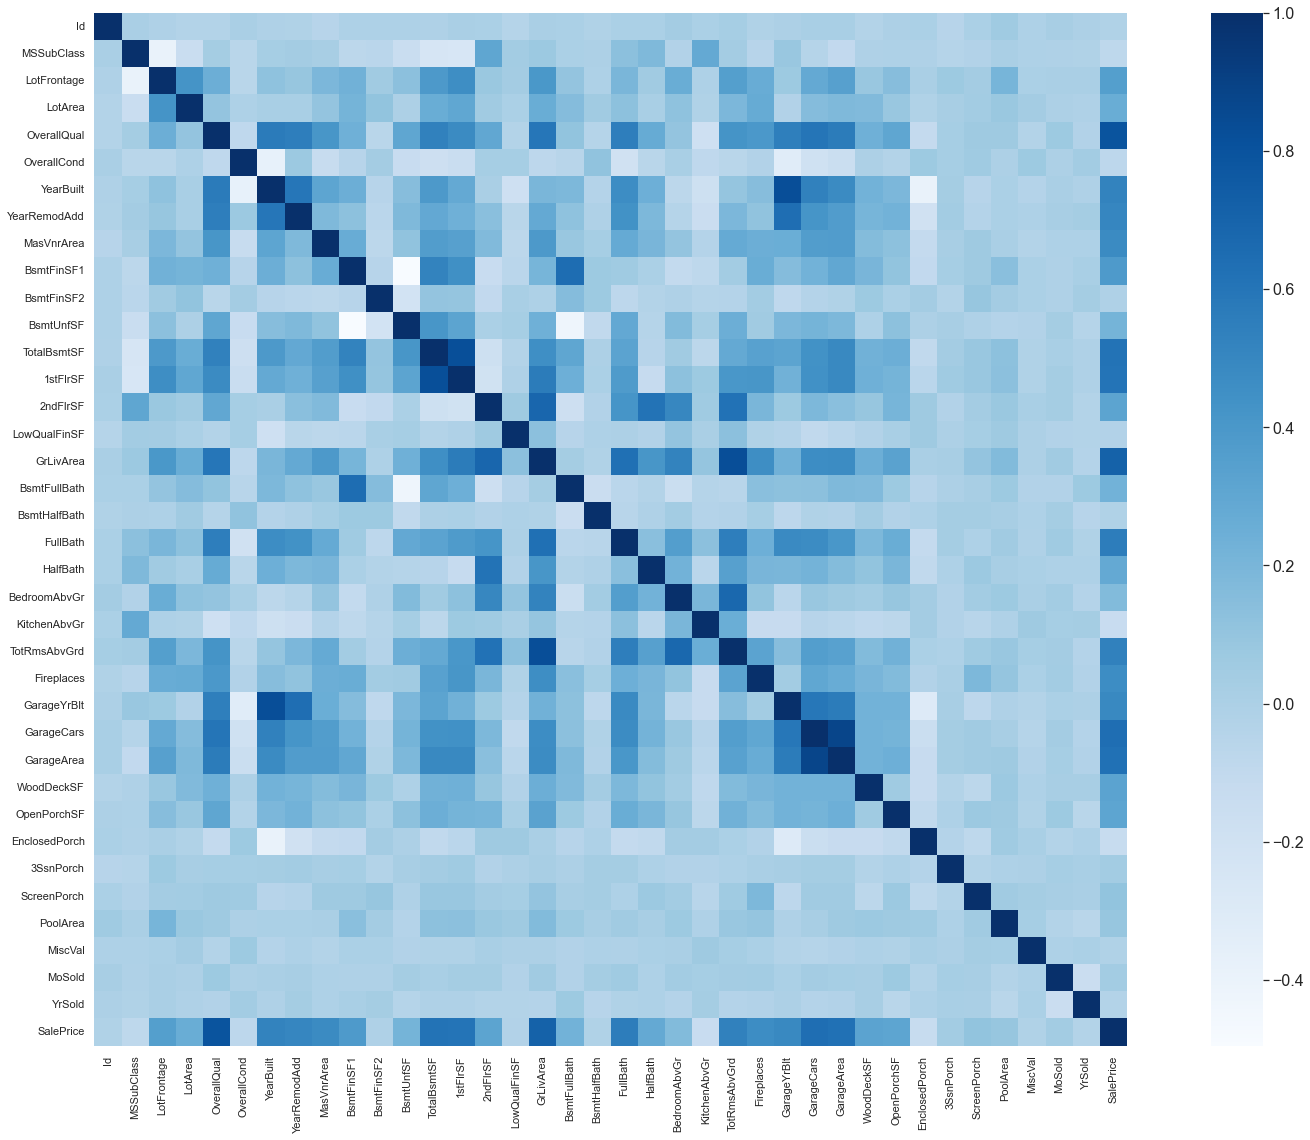

In [7]:
#correlation matrix
corrmat = train_data.corr(numeric_only=True)

#Plot a heatmap to visualize the correlations
f, ax = plt.subplots(figsize=(30, 19))
sns.set(font_scale=1.45)
sns.heatmap(corrmat, square=True, cmap='Blues')

# 4. Data Preprocessing

In [8]:
train_data.drop(['Id'], axis=1, inplace=True)
test_data.drop(['Id'], axis=1, inplace=True)

In [9]:
# delete data with too extreme value
train_data = train_data[train_data.GrLivArea < 4500]
train_data.reset_index(drop=True, inplace=True)
# reduce the absolute number of target value by using log function
train_data.loc[:, ('SalePrice')] = np.log1p(train_data["SalePrice"])
y = train_data['SalePrice'].reset_index(drop=True)

In [10]:
train_features = train_data.drop(['SalePrice'], axis=1)
test_features = test_data
features = pd.concat([train_features, test_features]).reset_index(drop=True)
features

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2913,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2914,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2915,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


<Axes: >

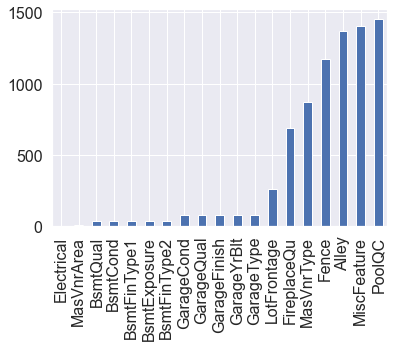

In [11]:
# check missing value
NaN = train_data.isnull().sum()
NaN = NaN[NaN > 0]
NaN.sort_values(inplace=True)
NaN.plot.bar()

In [12]:
#Based on the description of data, we know these variable has meaningful NaN
meaningful_NaN_list = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2",
                     "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC",
                     "Fence", "MiscFeature"]
for i in meaningful_NaN_list:
    features[i].fillna("None", inplace=True)

In [13]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    features[col] = features[col].fillna(0)
features['MasVnrArea'] = features['MasVnrArea'].fillna(features['MasVnrArea'].mean()) 

In [14]:
# MSZoning has high correlation with  MSSubClass
features['MSZoning'] = features.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))
# LotFrontage has high correlation with Neighborhood
features['LotFrontage'] = features.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))


In [15]:
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
objects = []
# categorical features
for i in features.columns:
    if features[i].dtype == object:
        objects.append(i)
features.update(features[objects].fillna('None'))


numerics = []
for i in features.columns:
    if features[i].dtype in numeric_dtypes:
        numerics.append(i)
features.update(features[numerics].fillna(0))

In [16]:
# create assembly features
features['YrBltAndRemod']=features['YearBuilt']+features['YearRemodAdd']
features['TotalSF']=features['TotalBsmtSF'] + features['1stFlrSF'] + features['2ndFlrSF']

features['Total_sqr_footage'] = (features['BsmtFinSF1'] + features['BsmtFinSF2'] +
                                 features['1stFlrSF'] + features['2ndFlrSF'])

features['Total_Bathrooms'] = (features['FullBath'] + (0.5 * features['HalfBath']) +
                               features['BsmtFullBath'] + (0.5 * features['BsmtHalfBath']))

features['Total_porch_sf'] = (features['OpenPorchSF'] + features['3SsnPorch'] +
                              features['EnclosedPorch'] + features['ScreenPorch'] +
                              features['WoodDeckSF'])

In [17]:
features['haspool'] = features['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
features['has2ndfloor'] = features['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
features['hasgarage'] = features['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
features['hasbsmt'] = features['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
features['hasfireplace'] = features['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [18]:
final_features = pd.get_dummies(features).reset_index(drop=True)
final_features.shape

(2917, 318)

In [19]:
X = final_features.iloc[:len(y), :]
X_test = final_features.iloc[len(y):, :]
X.shape, y.shape, X_test.shape

((1458, 318), (1458,), (1459, 318))

In [20]:
# get better performance by this
overfit = []
for i in X.columns:
    counts = X[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(X) * 100 > 99.95:
        overfit.append(i)

overfit = list(overfit)
overfit.append('MSZoning_C (all)')

X = X.drop(overfit, axis=1).copy()
X_test = X_test.drop(overfit, axis=1).copy()

In [21]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)

# 5. Construct models

In [22]:
# kfolds = KFold(n_splits=10, shuffle=True, random_state=54)

## Linear Regression

In [23]:
lm = LinearRegression()
lm_parameters = {"fit_intercept" : [True, False], "copy_X" : [True, False]}
lm_grid = GridSearchCV(lm, lm_parameters, verbose=1 , scoring = "r2")
lm_grid.fit(X_train, y_train)
best_lm = lm_grid.best_estimator_
best_lm.fit(X_train, y_train)
y_pred = best_lm.predict(X_valid)
lm_r2 = r2_score(y_valid, y_pred)
lm_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print("R^2 Score: " + str(lm_r2))
print("RMSE Score: " + str(lm_rmse))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
R^2 Score: 0.9157398399581153
RMSE Score: 0.11949800809655138


## Decision Tree Regression

In [24]:
tree = DecisionTreeRegressor()
tree_parameters = {"criterion" : ["friedman_mse", "absolute_error"], "splitter" : ["best", "random"], 
                  "min_samples_split" : [2, 3, 5, 10], "max_features" : ["sqrt", "log2"]}
tree_grid = GridSearchCV(tree, tree_parameters, verbose=1 , scoring = "r2")
tree_grid.fit(X_train, y_train)
best_tree = tree_grid.best_estimator_
best_tree.fit(X_train, y_train)
y_pred = best_tree.predict(X_valid)
tree_r2 = r2_score(y_valid, y_pred)
tree_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print("R^2 Score: " + str(tree_r2))
print("RMSE Score: " + str(tree_rmse))

Fitting 5 folds for each of 32 candidates, totalling 160 fits
R^2 Score: 0.7147584476171275
RMSE Score: 0.21986490979869275


## Random Forest Regression

In [25]:
forest = RandomForestRegressor()
forest_parameters = {"n_estimators" : [5, 10, 15, 20], "criterion" : ["absolute_error" , "friedman_mse"], 
                     "min_samples_split" : [2, 3, 5, 10], "max_features" : ["sqrt", "log2"]}
forest_grid = GridSearchCV(forest, forest_parameters, verbose=1 , scoring = "r2")
forest_grid.fit(X_train, y_train)
best_forest = forest_grid.best_estimator_
best_forest.fit(X_train, y_train)
y_pred = best_forest.predict(X_valid)
forest_r2 = r2_score(y_valid, y_pred)
forest_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print("R^2 Score: " + str(forest_r2))
print("RMSE Score: " + str(forest_rmse))

Fitting 5 folds for each of 64 candidates, totalling 320 fits
R^2 Score: 0.8940968034713352
RMSE Score: 0.13396892135957023


## Ridge Regression

In [26]:
ridge = Ridge()
ridge_parameters = {"fit_intercept" : [True, False], 
                    "copy_X" : [True, False], 
                    "solver" : ["auto", "svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga"]}
ridge_grid = GridSearchCV(ridge, ridge_parameters, verbose=1 , scoring = "r2")
ridge_grid.fit(X_train, y_train)
best_ridge = ridge_grid.best_estimator_
best_ridge.fit(X_train, y_train)
y_pred = best_ridge.predict(X_valid)
ridge_r2 = r2_score(y_valid, y_pred)
ridge_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print("R^2 Score: " + str(ridge_r2))
print("RMSE Score: " + str(ridge_rmse))

Fitting 5 folds for each of 28 candidates, totalling 140 fits


/Users/behind3220/miniconda3/envs/beamznt/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/behind3220/miniconda3/envs/beamznt/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/behind3220/miniconda3/envs/beamznt/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/behind3220/miniconda3/envs/beamznt/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/behind3220/miniconda3/envs/beamznt/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

R^2 Score: 0.9290993658605171
RMSE Score: 0.1096161604973928


## Lasso Regression

In [27]:
lasso = Lasso()
lasso_parameters = {"fit_intercept" : [True, False], 
                    "copy_X" : [True, False], "selection" : ["cyclic", "random"]}
lasso_grid = GridSearchCV(lasso, lasso_parameters, verbose=1 , scoring = "r2")
lasso_grid.fit(X_train, y_train)
best_lasso = lasso_grid.best_estimator_
best_lasso.fit(X_train, y_train)
y_pred = best_lasso.predict(X_valid)
lasso_r2 = r2_score(y_valid, y_pred)
lasso_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print("R^2 Score: " + str(lasso_r2))
print("RMSE Score: " + str(lasso_rmse))

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/Users/behind3220/miniconda3/envs/beamznt/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.541e+01, tolerance: 1.349e+01
  model = cd_fast.enet_coordinate_descent(


R^2 Score: 0.8665646795530862
RMSE Score: 0.1503782158075999


## Elastic Net

In [28]:
enet = ElasticNet()
enet_parameters = {"fit_intercept" : [True, False], 
                    "copy_X" : [True, False], "selection" : ["cyclic", "random"]}
enet_grid = GridSearchCV(enet, enet_parameters, verbose=1 , scoring = "r2")
enet_grid.fit(X_train, y_train)
best_enet = enet_grid.best_estimator_
best_enet.fit(X_train, y_train)
y_pred = best_enet.predict(X_valid)
enet_r2 = r2_score(y_valid, y_pred)
enet_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print("R^2 Score: " + str(enet_r2))
print("RMSE Score: " + str(enet_rmse))

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/Users/behind3220/miniconda3/envs/beamznt/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.383e+01, tolerance: 1.349e+01
  model = cd_fast.enet_coordinate_descent(


R^2 Score: 0.8687741096444594
RMSE Score: 0.14912803326849208


## Gradient Boosting Regression

In [29]:
gbr = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, 
                                max_features='sqrt', min_samples_leaf=15, 
                                min_samples_split=10, loss='huber', random_state =54)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_valid)
gbr_r2 = r2_score(y_valid, y_pred)
gbr_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print("R^2 Score: " + str(gbr_r2))
print("RMSE Score: " + str(gbr_rmse))

R^2 Score: 0.9286795694989842
RMSE Score: 0.10994019533823618


## LightGBM

In [30]:
lightgbm = LGBMRegressor(objective='regression', 
                                       num_leaves=4,
                                       learning_rate=0.01, 
                                       n_estimators=5000,
                                       max_bin=200, 
                                       bagging_fraction=0.78,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.2,
                                       feature_fraction_seed=7,
                                       verbose=-1,
                                       )
lightgbm.fit(X_train, y_train)
y_pred = lightgbm.predict(X_valid)
lightgbm_r2 = r2_score(y_valid, y_pred)
lightgbm_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print("R^2 Score: " + str(lightgbm_r2))
print("RMSE Score: " + str(lightgbm_rmse))

R^2 Score: 0.9284520661239434
RMSE Score: 0.11011540355665594


## XGBoost

In [31]:
xgboost = XGBRegressor(learning_rate=0.01,n_estimators=3800,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:squarederror', nthread=-1,
                                     scale_pos_weight=1, seed=28,
                                     reg_alpha=0.00006)
xgboost.fit(X_train, y_train)
y_pred = xgboost.predict(X_valid)
xgboost_r2 = r2_score(y_valid, y_pred)
xgboost_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print("R^2 Score: " + str(xgboost_r2))
print("RMSE Score: " + str(xgboost_rmse))

R^2 Score: 0.9300859327430749
RMSE Score: 0.1088508463762751


## Model Selection

In [32]:
model_performances = pd.DataFrame({
    "Model" : ["Linear Regression", "Decision Tree Regression", "Random Forest Regression", 
               "Ridge Regression", "Lasso Regression", "Elastic Net", "Gradient Boosting Regression",
               "LightGBM", "XGBoost"],
    "R^2 Score" : [str(lm_r2)[0:5], str(tree_r2)[0:5],  str(forest_r2)[0:5], str(ridge_r2)[0:5],
                   str(lasso_r2)[0:5], str(enet_r2)[0:5], str(gbr_r2)[0:5],  str(lightgbm_r2)[0:5],
                   str(xgboost_r2)[0:5]],
    "RMSE" : [str(lm_rmse)[0:8], str(tree_rmse)[0:8],  str(forest_rmse)[0:8], str(ridge_rmse)[0:8],
              str(lasso_rmse)[0:8], str(enet_rmse)[0:8], str(gbr_rmse)[0:8], str(lightgbm_rmse)[0:8],
              str(xgboost_rmse)[0:8]]
})
model_performances.round(4)

print("Model Performances Table:")
model_performances.sort_values(by="R^2 Score", ascending=False)
model_performances.sort_values(by="RMSE", ascending=False)

Model Performances Table:


,Model,R^2 Score,RMSE
1,Decision Tree Regression,0.714,0.219864
4,Lasso Regression,0.866,0.150378
5,Elastic Net,0.868,0.149128
2,Random Forest Regression,0.894,0.133968
0,Linear Regression,0.915,0.119498
7,LightGBM,0.928,0.110115
6,Gradient Boosting Regression,0.928,0.109940
3,Ridge Regression,0.929,0.109616
8,XGBoost,0.930,0.108850


From above table, we can consider remove Decision tree, Lasso regression, and Elastic Net in the ensembling learning part, which have lower R^2 Score and higher RMSE compare to other models.
Furthermore, we can see XGBoost has best performance.

In [33]:
stack_gen = StackingCVRegressor(regressors=(best_ridge, gbr, xgboost, lightgbm),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)
stack_gen.fit(X_train, y_train)
y_pred = stack_gen.predict(X_valid)
stack_gen_r2 = r2_score(y_valid, y_pred)
stack_gen_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print("R^2 Score: " + str(stack_gen_r2))
print("RMSE Score: " + str(stack_gen_rmse))

R^2 Score: 0.923952686857147
RMSE Score: 0.11352498769455238


/Users/behind3220/miniconda3/envs/beamznt/lib/python3.9/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
/Users/behind3220/miniconda3/envs/beamznt/lib/python3.9/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


In [34]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [35]:
def blend_models_predict(X):
    return ((0.05 * best_forest.predict(X)) + \
            (0.05 * best_lm.predict(X)) + \
            (0.2 * best_ridge.predict(X)) + \
            (0.1 * gbr.predict(X)) + \
            (0.3 * xgboost.predict(X)) + \
            (0.1 * lightgbm.predict(X)) + \
            (0.2 * stack_gen.predict(np.array(X))))
print('RMSLE score:')
print(rmsle(y_train, blend_models_predict(X_train)))

RMSLE score:
0.049351131953438335


In [36]:
submission_predictions = np.exp(blend_models_predict(X_test))
print(submission_predictions)

[121265.54070015 162085.03795958 187139.48403903 ... 164772.34349828
 114420.22423606 219031.45764002]


In [37]:
res=pd.DataFrame(columns = ['Id', 'SalePrice'])
res['Id'] = test_data.index + 1461
res['SalePrice'] = submission_predictions
res.to_csv('submission1.csv',index=False)

### Best Score: 0.11720
### LeaderBoard ranking: 477-513(same score)